선택한 가상화폐의 5일 이동평균을 1일 1회 체크

현재 가격이 이동평균보다 높으면 매수 또는 보유

현재 가격이 이동평균보다 낮으면 매도 또는 투자 보류

현금 비중은 80%로 유지

자금 관리 : 가상화폐별 투입 금액은 자산의 20% / 가상화폐 수 (5개 화폐를 포함할 경우 각 화폐에 자산의 20% / 5 = 4% 를 투자)


필요한 데이터를 불러온다

In [27]:
#필요한 데이터를 불러온다

import pybithumb
import pandas as pd
import numpy as np

일단 비트코인 하나로만 가지고 해보자. 

In [28]:
btc_df = pybithumb.get_ohlcv('BTC')
btc_df

open        high         low       close  \
time                                                                  
2013-12-27 00:00:00    737000.0    755000.0    737000.0    755000.0   
2013-12-28 00:00:00    750000.0    750000.0    750000.0    750000.0   
2013-12-29 00:00:00    750000.0    750000.0    728000.0    739000.0   
2013-12-30 00:00:00    740000.0    772000.0    740000.0    768000.0   
2013-12-31 00:00:00    768000.0    800000.0    763000.0    768000.0   
...                         ...         ...         ...         ...   
2022-03-31 00:00:00  56857000.0  57185000.0  56265000.0  56643000.0   
2022-04-01 00:00:00  56643000.0  56699000.0  54268000.0  56167000.0   
2022-04-02 00:00:00  56158000.0  57361000.0  55973000.0  56658000.0   
2022-04-03 00:00:00  56630000.0  56850000.0  55800000.0  56705000.0   
2022-04-04 12:00:00  56708000.0  57500000.0  56064000.0  56417000.0   

                          volume  
time                              
2013-12-27 00:00:00     3.780000  
2013-12-28 00:00:00    12.000000  
2013-12-29 00:00:00    19.058000  
2013-12-30 00:00:00     9.488973  
2013-12-31 00:00:00    18.650350  
...                          ...  
2022-03-31 00:00:00  3987.703359  
2022-04-01 00:00:00  4367.598752  
2022-04-02 00:00:00  3203.250023  
2022-04-03 00:00:00  2407.050967  
2022-04-04 12:00:00   899.094351  

[2931 rows x 5 columns]

In [29]:
# 5일 이동평균선 구하기
btc_df['ma_5'] = btc_df['close'].rolling(window=5).mean()

# 5일 이평선이 없는 날짜는 삭제한다
btc_df.dropna(inplace=True)

In [38]:
total_capital = 0 # 전체 투자금액
investing_weight = 0.2 # 80%정도 현금을 남긴다
cash = 100000000 # 현금, 처음 시드머니 1억
fee = 0.002 # 수수료 0.2%
btc_invested = 0 # 가상화폐에 투자된 금액

btc_close_price_list = []
total_capital_list = []

for i in range(len(btc_df)):
    
    yesterday_btc_close = btc_df.iloc[i-1]['close']
    btc_close = btc_df.iloc[i]['close']    
    
    # 비트코인 변동만큼 투자금액에 반영한다
    btc_invested *= (btc_close / yesterday_btc_close)    
    
     # 총금액은 현금과 비트코인 투자한 금액
    total_capital = cash + btc_invested
    
    # 만약 btc 가격이 5일이평선보다 커지면 매수한다
    if (btc_df.iloc[i]['close'] >= btc_df.iloc[i]['ma_5']) and (btc_invested == 0):
        
        print('buy')
        
        # 현금은 80% 남긴다
        cash = total_capital * (1 - investing_weight)
        
        # 비트코인에는 20%만 투자한다(수수료비용은 차감한다)
        btc_invested = total_capital * (investing_weight) * (1 - fee)
        total_capital = cash + btc_invested # 전체 투자금액은 현금에 비트코인에 투자된 금액이다
        
    # 만약 btc 가격이 5일이평선보다 작아지면 매도한다
    elif (btc_df.iloc[i]['close'] < btc_df.iloc[i]['ma_5']) and (btc_invested != 0):
        
        print('sell')
        
        # 비트코인을 매도한다 (매도할때 수수료 차감한다)
        btc_invested = btc_invested * (1 - fee)
        total_capital = cash + btc_invested # 전체 투자금액은 현금에 비트코인에 투자된 금액이다
        cash = total_capital #전체 투자금액은 현금으로 보유한다 
        
        # 비트코인 투자금액을 0으로 만든다
        btc_invested = 0
        
        
    btc_close_price_list.append(btc_close)
    total_capital_list.append(total_capital)
    
    print(btc_close, total_capital)

buy
768000.0 99960000.0
777000.0 100193906.25
778000.0 100219895.83333333
834000.0 101675312.5
846000.0 101987187.5
925000.0 104040364.58333333
1010000.0 106249479.16666666
935000.0 104300260.41666666
sell
897000.0 103266030.9375
865000.0 103266030.9375
890000.0 103266030.9375
buy
932000.0 103224724.525125
910000.0 102738177.53472506
sell
881000.0 102057852.14751218
874000.0 102057852.14751218
buy
905000.0 102017029.00665319
910000.0 102129574.57178381
sell
885000.0 101527005.61607444
885000.0 101527005.61607444
893000.0 101527005.61607444
buy
898000.0 101486394.81382802
899000.0 101508961.3954772
sell
892000.0 101310736.54227075
888000.0 101310736.54227075
870000.0 101310736.54227075
870000.0 101310736.54227075
buy
892000.0 101270212.24765386
886000.0 101134192.36191055
sell
879000.0 100935648.66868725
864000.0 100935648.66868725
874000.0 100935648.66868725
buy
883000.0 100895274.4092198
899000.0 101260334.53106387
902000.0 101328783.30390963
896000.0 101191885.75821811
sell
891000.0 

286500.0 108133616.6045527
sell
287000.0 108127778.65862906
buy
289000.0 108084527.5471656
sell
287000.0 107892303.14546126
283500.0 107892303.14546126
278500.0 107892303.14546126
277000.0 107892303.14546126
274500.0 107892303.14546126
276000.0 107892303.14546126
buy
277000.0 107849146.22420308
277000.0 107849146.22420308
277000.0 107849146.22420308
sell
274000.0 107573307.74927387
buy
277000.0 107530278.42617416
278500.0 107646550.80285335
281000.0 107840338.09731863
286500.0 108266670.1451423
284500.0 108111640.30957006
283000.0 107995367.93289088
290500.0 108576729.81628677
289000.0 108460457.43960759
287000.0 108305427.60403536
288000.0 108382942.52182147
290000.0 108537972.35739371
290500.0 108576729.81628677
289500.0 108499214.89850065
sell
289000.0 108415653.81712721
buy
296000.0 108372287.55560037
295500.0 108335733.89934716
sell
291500.0 108000683.08613026
291500.0 108000683.08613026
291500.0 108000683.08613026
buy
293000.0 107957482.8128958
293500.0 107994269.3936876
296500.0

1172000.0 144332340.11319575
1115000.0 144332340.11319575
1167000.0 144332340.11319575
1120000.0 144332340.11319575
1113000.0 144332340.11319575
997000.0 144332340.11319575
924000.0 144332340.11319575
963000.0 144332340.11319575
988000.0 144332340.11319575
buy
975000.0 144274607.1771505
985000.0 144570081.38316682
1065000.0 146933875.0312976
1037000.0 146106547.25445184
1065000.0 146933875.0312976
1070000.0 147081612.13430578
1097000.0 147879392.49054992
1094000.0 147790750.228745
1101000.0 147997582.17295647
sell
1085000.0 147460705.54062477
1077000.0 147460705.54062477
1089000.0 147460705.54062477
buy
1092000.0 147401721.25840855
1096000.0 147509535.0196756
1100000.0 147617348.78094265
1100000.0 147617348.78094265
1132000.0 148479858.87107918
1174000.0 149611903.36438337
1195000.0 150177925.61103544
1232000.0 151175202.9027558
1228000.0 151067389.14148873
1236000.0 151283016.66402286
1232000.0 151175202.9027558
1243000.0 151471690.74624023
1244000.0 151498644.186557
sell
1132000.0 14

19970000.0 295943857.37040824
20373000.0 297196533.37506706
22844000.0 304877333.3937073
24092000.0 308756588.11781204
25043000.0 311712654.8186323
sell
22888000.0 304871812.9158306
22685000.0 304871812.9158306
20536000.0 304871812.9158306
19495000.0 304871812.9158306
19698000.0 304871812.9158306
buy
20662000.0 304749864.1906643
sell
19014000.0 299784281.3026488
19301000.0 299784281.3026488
15649000.0 299784281.3026488
11820000.0 299784281.3026488
14765000.0 299784281.3026488
14887000.0 299784281.3026488
buy
16458000.0 299664367.5901277
sell
14300000.0 291714467.32427067
13331000.0 291714467.32427067
12898000.0 291714467.32427067
13287000.0 291714467.32427067
12922000.0 291714467.32427067
12635000.0 291714467.32427067
12481000.0 291714467.32427067
buy
13295000.0 291597781.537341
sell
12818000.0 289396458.6247873
12100000.0 289396458.6247873
11075000.0 289396458.6247873
10453000.0 289396458.6247873
8884000.0 289396458.6247873
9650000.0 289396458.6247873
9458000.0 289396458.6247873
83000

7470000.0 298278898.4372676
7466000.0 298246663.4707427
7440000.0 298037136.18833077
7540000.0 298843010.3514535
7492000.0 298456190.7531546
sell
7443000.0 297941349.98530203
7254000.0 297941349.98530203
7218000.0 297941349.98530203
7183000.0 297941349.98530203
7210000.0 297941349.98530203
buy
7400000.0 297822173.4453079
7350000.0 297420355.2462737
7319000.0 297171227.9628725
7351000.0 297428391.6102544
sell
7299000.0 296893185.84186876
7306000.0 296893185.84186876
7312000.0 296893185.84186876
7287000.0 296893185.84186876
7289000.0 296893185.84186876
buy
7312000.0 296774428.56753206
sell
7285000.0 296437525.77661365
7266000.0 296437525.77661365
7267000.0 296437525.77661365
7273000.0 296437525.77661365
7146000.0 296437525.77661365
7147000.0 296437525.77661365
7100000.0 296437525.77661365
7165000.0 296437525.77661365
buy
7194000.0 296318950.766303
sell
7145000.0 295798405.64691496
buy
7176000.0 295680086.2846562
7236000.0 296173743.1556188
7213000.0 295984508.0217498
7306000.0 296749676.

6997000.0 363884390.4454639
6860000.0 363884390.4454639
6816000.0 363884390.4454639
6391000.0 363884390.4454639
6564000.0 363884390.4454639
buy
6668000.0 363738836.6892857
7276000.0 370361488.93799776
8217000.0 380611350.39529717
7750000.0 375524543.4871582
7637000.0 374293688.7106706
7748000.0 375502758.44686633
8203000.0 380458855.1132545
8270000.0 381188653.96303034
8153000.0 379914229.1059591
8131000.0 379674593.6627491
sell
7650000.0 374268635.914335
7545000.0 374268635.914335
7740000.0 374268635.914335
buy
7848000.0 374118928.4599693
sell
7630000.0 371898558.9847055
buy
8194000.0 371749799.5611116
8162000.0 371459905.678277
8134000.0 371206248.53079665
8185000.0 371668266.9065644
8498000.0 374503791.44804084
8711000.0 376433397.60565895
8748000.0 376768587.40768653
8817000.0 377393671.0925487
sell
8352000.0 373029826.00076807
8365000.0 373029826.00076807
8563000.0 373029826.00076807
8254000.0 373029826.00076807
buy
8397000.0 372880614.0703678
sell
8223000.0 371191916.81739515
buy

51403000.0 504005982.0400171
buy
54363000.0 503804379.6472012
55600000.0 506093467.77325726
57669000.0 509922185.0997003
56759000.0 508238215.661777
sell
55836000.0 506323538.7098266
55236000.0 506323538.7098266
buy
57691000.0 506121009.2943427
58137000.0 506902305.01696163
62203000.0 514025059.2953668
64047000.0 517255349.23372865
65061000.0 519031658.34300137
65265000.0 519389022.3058136
68689000.0 525387131.17183906
69209000.0 526298058.920184
sell
65171000.0 518996023.55019975
64220000.0 518996023.55019975
63521000.0 518996023.55019975
buy
67305000.0 518788425.14077973
68318000.0 520347570.7790314
68745000.0 521004782.21786004
67093000.0 518462128.126654
sell
67092000.0 518254061.4494957
65240000.0 518254061.4494957
buy
67584000.0 518046759.8249159
sell
63115000.0 511013338.84488225
64170000.0 511013338.84488225
buy
65632000.0 510808933.5093443
66784000.0 512599249.1834563
68860000.0 515825547.22117907
70099000.0 517751069.0269298
70508000.0 518386693.25497824
72067000.0 520809524.

In [39]:
ror_df = pd.DataFrame({"btc_close" : btc_close_price_list, "total_capital" : total_capital_list}, index = btc_df.index)

In [40]:
ror_df['ror'] = ror_df['total_capital'].pct_change() + 1
ror_df['cum_ror'] = ror_df['ror'].cumprod()

In [41]:
ror_df

btc_close  total_capital       ror   cum_ror
time                                                              
2013-12-31 00:00:00    768000.0   9.996000e+07       NaN       NaN
2014-01-01 00:00:00    777000.0   1.001939e+08  1.002340  1.002340
2014-01-02 00:00:00    778000.0   1.002199e+08  1.000259  1.002600
2014-01-03 00:00:00    834000.0   1.016753e+08  1.014522  1.017160
2014-01-04 00:00:00    846000.0   1.019872e+08  1.003067  1.020280
...                         ...            ...       ...       ...
2022-03-31 00:00:00  56643000.0   5.456760e+08  0.999260  5.458943
2022-04-01 00:00:00  56167000.0   5.444633e+08  0.997778  5.446812
2022-04-02 00:00:00  56658000.0   5.444633e+08  1.000000  5.446812
2022-04-03 00:00:00  56705000.0   5.442455e+08  0.999600  5.444633
2022-04-04 12:00:00  56417000.0   5.434773e+08  0.998589  5.436948

[2927 rows x 4 columns]

In [44]:
# 전 고점(HWM : High Water Mark)
ror_df['highwatermark'] =  ror_df['cum_ror'].cummax()
ror_df['drawdown'] = (ror_df['cum_ror'] / ror_df['highwatermark']) - 1

In [45]:
# mdd를 구한다
ror_df['max_drawdown'] = ror_df['drawdown'].cummin()

In [46]:
ror_df

btc_close  total_capital       ror   cum_ror  \
time                                                                 
2013-12-31 00:00:00    768000.0   9.996000e+07       NaN       NaN   
2014-01-01 00:00:00    777000.0   1.001939e+08  1.002340  1.002340   
2014-01-02 00:00:00    778000.0   1.002199e+08  1.000259  1.002600   
2014-01-03 00:00:00    834000.0   1.016753e+08  1.014522  1.017160   
2014-01-04 00:00:00    846000.0   1.019872e+08  1.003067  1.020280   
...                         ...            ...       ...       ...   
2022-03-31 00:00:00  56643000.0   5.456760e+08  0.999260  5.458943   
2022-04-01 00:00:00  56167000.0   5.444633e+08  0.997778  5.446812   
2022-04-02 00:00:00  56658000.0   5.444633e+08  1.000000  5.446812   
2022-04-03 00:00:00  56705000.0   5.442455e+08  0.999600  5.444633   
2022-04-04 12:00:00  56417000.0   5.434773e+08  0.998589  5.436948   

                     highwatermark  drawdown  max_drawdown  
time                                                        
2013-12-31 00:00:00            NaN       NaN           NaN  
2014-01-01 00:00:00       1.002340  0.000000      0.000000  
2014-01-02 00:00:00       1.002600  0.000000      0.000000  
2014-01-03 00:00:00       1.017160  0.000000      0.000000  
2014-01-04 00:00:00       1.020280  0.000000      0.000000  
...                            ...       ...           ...  
2022-03-31 00:00:00       5.764905 -0.053073     -0.131403  
2022-04-01 00:00:00       5.764905 -0.055178     -0.131403  
2022-04-02 00:00:00       5.764905 -0.055178     -0.131403  
2022-04-03 00:00:00       5.764905 -0.055556     -0.131403  
2022-04-04 12:00:00       5.764905 -0.056889     -0.131403  

[2927 rows x 7 columns]

In [42]:
import matplotlib.pyplot as plt

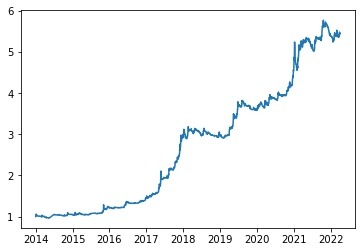

In [43]:
plt.plot(ror_df['cum_ror'])